# Requirements

In [1]:
import torch
import os
import numpy as np
import argparse
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.utils as vutils
from network.Transformer import Transformer
import matplotlib.pyplot as plt

# Set Params

In [2]:
IMAGE_PATH = 'test_img/test_photo.jpg'
LOAD_SIZE = 640
MODELS = ['Hayao', 'Hosoda', 'Paprika', 'Shinkai']

In [3]:
# Configs plt
def imshow(img):
    plt.rcParams["figure.figsize"] = (20,30)
    plt.axis('off')
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [4]:
input_image = Image.open(os.path.join(IMAGE_PATH)).convert("RGB")

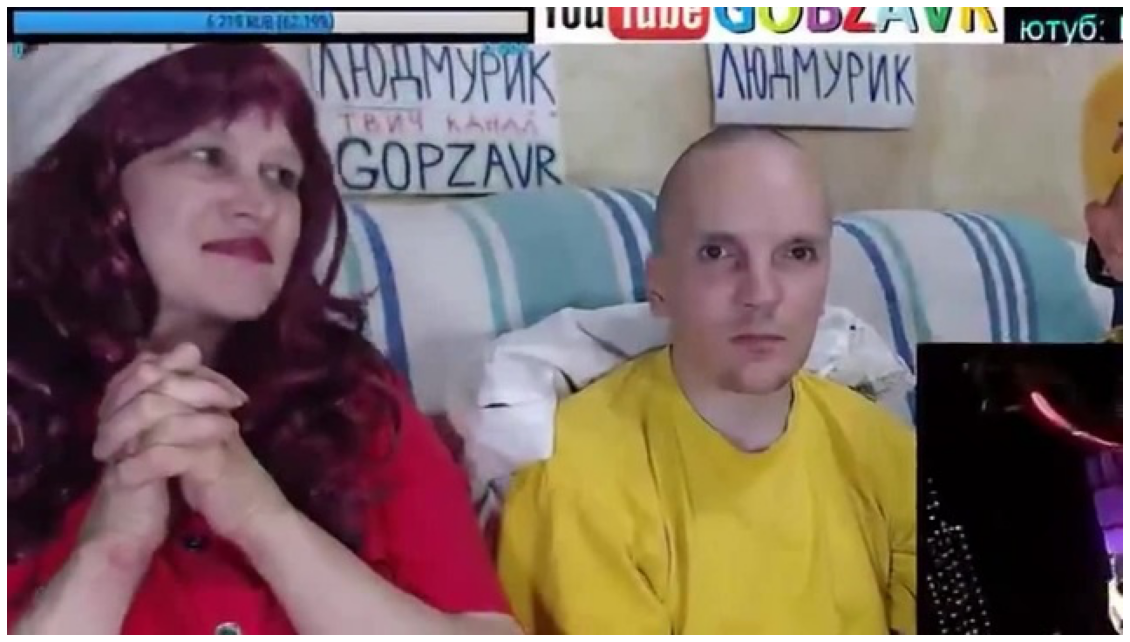

/home/malchul/work/projects/GANs/CartoonGAN-Test-Pytorch-Torch/venv/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


In [5]:
h = input_image.size[0]
w = input_image.size[1]
ratio = h *1.0 / w
if ratio > 1:
    h = LOAD_SIZE
    w = int(h*1.0/ratio)
else:
    w = LOAD_SIZE
    h = int(w * ratio)


input_image = input_image.resize((h, w), Image.BICUBIC)
input_image = np.asarray(input_image)
# RGB -> BGR
input_image = input_image[:, :, [2, 1, 0]]
input_image = transforms.ToTensor()(input_image).unsqueeze(0)
imshow(input_image[0, [2,1,0], :, :])
# preprocess, (-1, 1)
input_image = -1 + 2 * input_image 

input_image = Variable(input_image, volatile=True).cuda()

In [6]:
outputs = []
for model_name in MODELS:
    model = Transformer()
    model.load_state_dict(torch.load(os.path.join('./pretrained_model', model_name + '_net_G_float.pth')))
    model.eval()
    model.cuda()
    



    # forward
    output_image = model(input_image)
    output_image = output_image[0]
    # BGR -> RGB
    output_image = output_image[[2, 1, 0], :, :]
    # deprocess, (0, 1)
    output_image = output_image.data.cpu().float() * 0.5 + 0.5
    outputs.append(output_image)

/home/malchul/work/projects/GANs/CartoonGAN-Test-Pytorch-Torch/venv/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


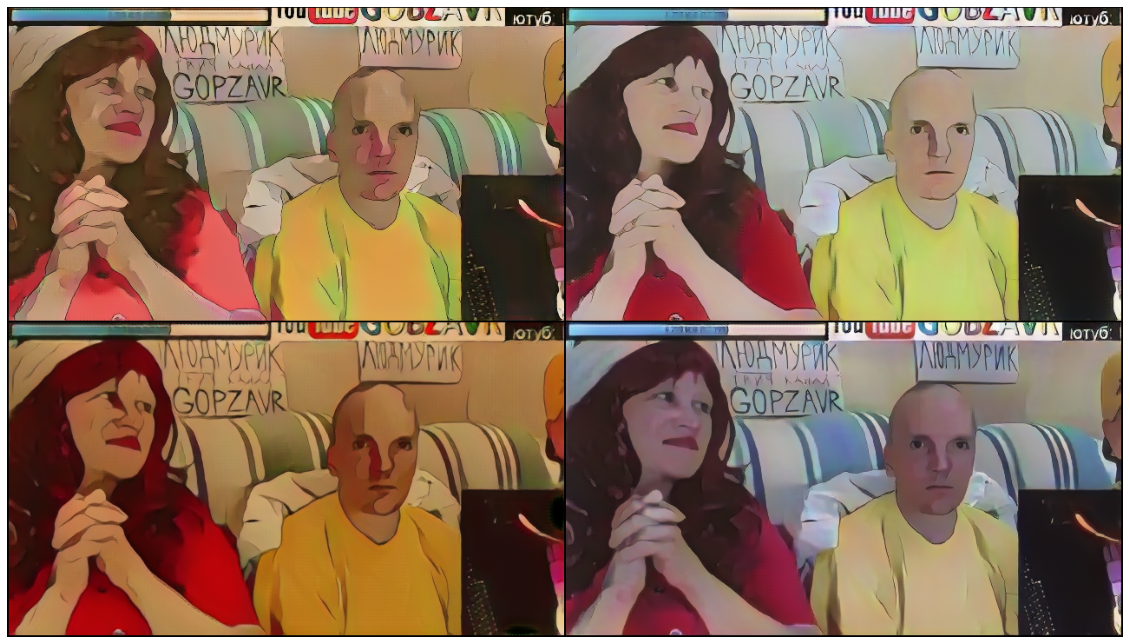

In [7]:
    
# Make square


nrows = int(np.round(np.sqrt(len(outputs))))
imshow(vutils.make_grid(outputs, nrow=nrows))